In [86]:
import numpy as np
import argparse
import cv2

from matplotlib import pyplot as plt

In [106]:
kernel1 = np.ones((3,3),np.uint8)
kernel1 = np.ones((25,25),np.uint8)

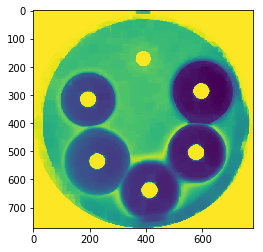

In [107]:
img = cv2.imread("00aMan2.jpg")
#output = image.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#y = cv2.Canny(img,150,500)
y1 = cv2.Canny(img,100,200)
#image_edged = cv2.dilate(y, kernel1, iterations=2)
#image_edged = cv2.dilate(gray, kernel1, iterations=2)
#image_edged = cv2.erode(image_edged, kernel1, iterations=1)
closing = cv2.morphologyEx(gray , cv2.MORPH_CLOSE, kernel1)


plt.imshow(closing)

In [108]:
# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(closing,  
                  # cv2.HOUGH_GRADIENT, 1.2, 20, param1 = 30, 
              # param2 = 30, minRadius = 10, maxRadius = 30)
                     cv2.HOUGH_GRADIENT, 1, 20, param1 = 40, 
               param2 = 40, minRadius = 70, maxRadius = 120)
   
# Draw circles that are detected. 
if detected_circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles)) 
  
    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 
        # Draw the circumference of the circle. 
        cv2.circle(img, (a, b), r, (0, 255, 0), 2) 
        # Draw a small circle (of radius 1) to show the center. 
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
        cv2.imshow("Detected Circle", img) 
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    